In [1]:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import matplotlib.pyplot as plt
import glob

Description of data:

In summary, the experimental runs were:

- Baseline, eyes open
- Baseline, eyes closed
- Task 1 (open and close left or right fist)
- Task 2 (imagine opening and closing left or right fist)
- Task 3 (open and close both fists or both feet)
- Task 4 (imagine opening and closing both fists or both feet)
- Task 1
- Task 2
- Task 3
- Task 4
- Task 1
- Task 2
- Task 3
- Task 4


Each annotation includes one of three codes (T0, T1, or T2):


- T0 corresponds to rest
- T1 corresponds to onset of motion (real or imagined) of
        the left fist (in runs 3, 4, 7, 8, 11, and 12)
        both fists (in runs 5, 6, 9, 10, 13, and 14)
- T2 corresponds to onset of motion (real or imagined) of
        the right fist (in runs 3, 4, 7, 8, 11, and 12)
        both feet (in runs 5, 6, 9, 10, 13, and 14)


The EEGs were recorded from 64 electrodes as per the international 10-10 system (excluding electrodes Nz, F9, F10, FT9, FT10, A1, A2, TP9, TP10, P9, and P10)

<img width="969" src="https://github.com/owalid/total-perspective-vortex/assets/28403617/3de37d6d-048e-4032-9c3c-eb070a8c184a">

Le choix du meilleur moyen de filtrer dépendra du type de bruit que vous souhaitez éliminer, de vos objectifs d'analyse et des caractéristiques spécifiques de vos données. Voici quelques techniques couramment utilisées pour filtrer les données EEG :

- **Filtre passe-bas :** Un filtre passe-bas permet de supprimer les fréquences supérieures à une certaine valeur. Cela peut être utile pour éliminer le bruit haute fréquence, mais il faut être prudent car cela peut également atténuer les signaux EEG de haute fréquence qui sont pertinents.
- **Filtre passe-haut :** Un filtre passe-haut élimine les fréquences basses. Cela peut être utilisé pour enlever les dérives lentes ou les interférences à basse fréquence. De même, il faut être prudent pour ne pas perdre les informations à basse fréquence contenues dans les signaux EEG.
- **Filtre bande-passante :** Un filtre bande-passante permet de conserver une plage spécifique de fréquences et d'éliminer les fréquences en dehors de cette plage. Cela peut être utile pour isoler des bandes de fréquences spécifiques, comme les ondes alpha (8-13 Hz) ou bêta (13-30 Hz).
- **Filtre réjecteur de bande (notch) :** Ce type de filtre élimine une fréquence spécifique et ses harmoniques. Il est utilisé pour supprimer les interférences provenant de sources extérieures, comme le bruit secteur (50 Hz ou 60 Hz).
- **Filtrage spatial :** L'analyse de composantes indépendantes (ICA) peut être utilisée pour extraire des sources indépendantes des signaux EEG, aidant à séparer les sources de bruit des sources cérébrales.

In [2]:
files = glob.glob('../files/S00*/*.edf')

In [3]:
len(files)

126

In [4]:
raws = [read_raw_edf(f, preload=True, stim_channel='auto') for f in files]
raw_obj = concatenate_raws(raws)

Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.9

In [5]:
raw_obj.ch_names

['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

In [6]:
original_raw = raw_obj.copy()

In [7]:
events, event_dict = mne.events_from_annotations(original_raw)
print(original_raw.info)
print(event_dict)

Used Annotations descriptions: ['T0', 'T1', 'T2']
<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>
{'T0': 1, 'T1': 2, 'T2': 3}


In [8]:
picks = mne.pick_types(original_raw.info, meg=True, eeg=True, stim=False, eog=False, exclude='bads')

In [9]:
eegbci.standardize(original_raw)
montage = mne.channels.make_standard_montage('standard_1005')
original_raw.set_montage(montage)

<RawEDF | S001R08.edf, 64 x 2312640 (14454.0 s), ~1.10 GB, data loaded>

Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


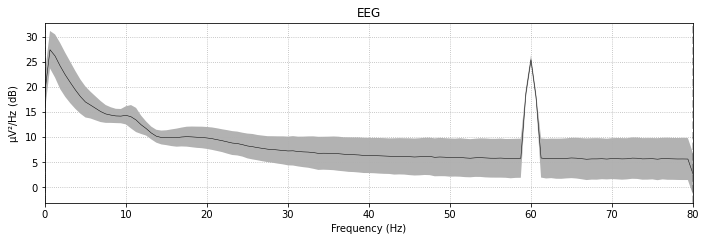

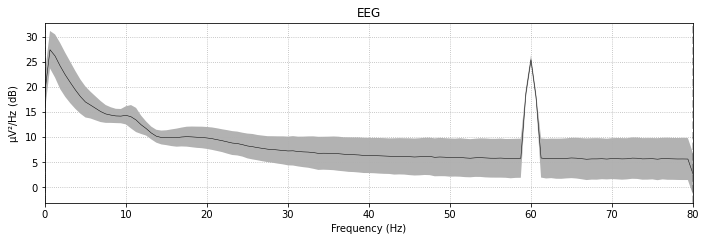

In [10]:
original_raw.compute_psd().plot(average=True)

Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


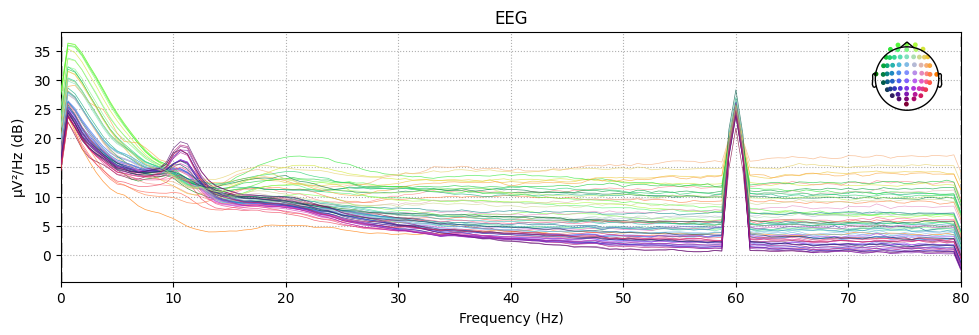

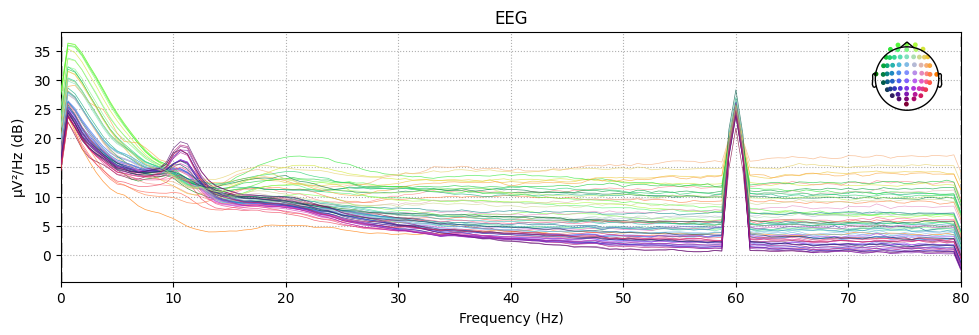

In [11]:
original_raw.compute_psd().plot()

## Notch filter

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    4.8s finished


Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


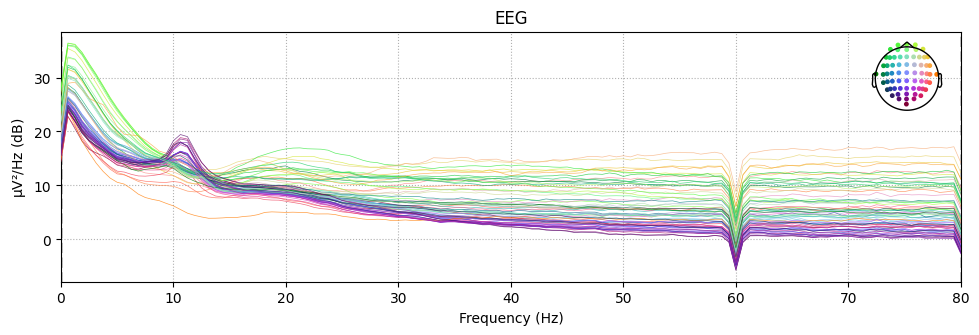

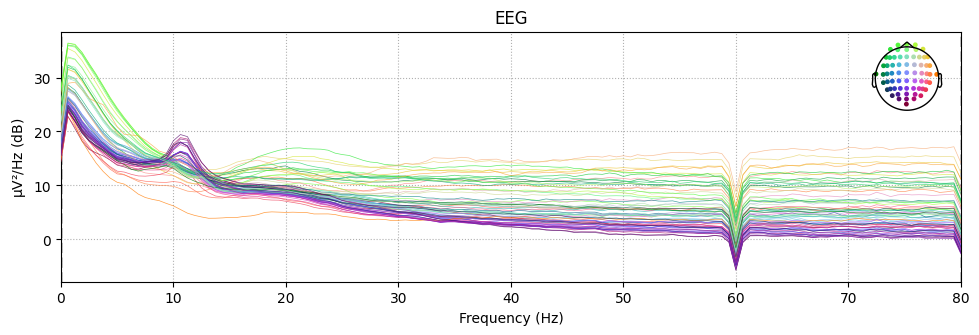

In [12]:
# Notch filter
notch_freq = 60
original_raw.notch_filter(notch_freq, fir_design='firwin')
original_raw.compute_psd().plot()

## Band-pass filter keep only alpha and beta waves

Filtering raw data in 126 contiguous segments
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


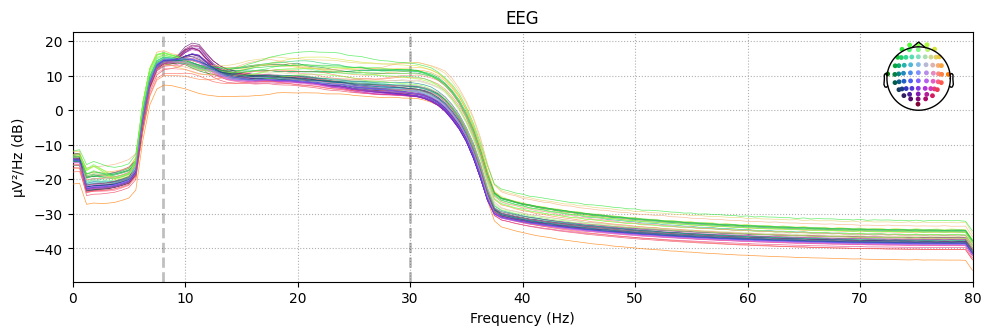

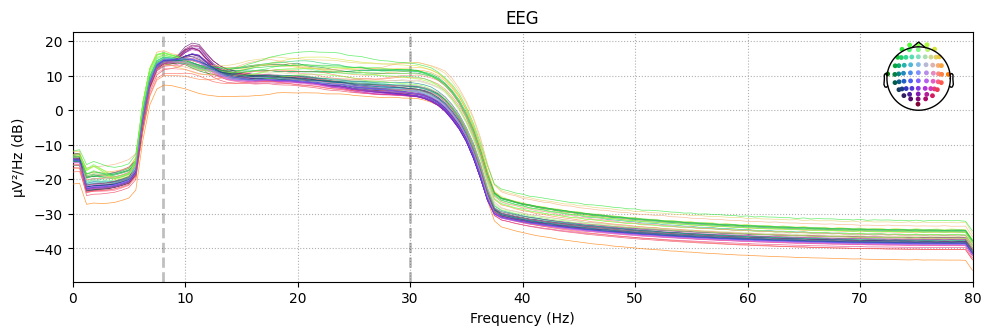

In [13]:
# Band-pass filter keep only alpha and beta waves
low_cutoff = 8
high_cutoff = 30
original_raw.filter(low_cutoff, high_cutoff, fir_design='firwin')
original_raw.compute_psd().plot()

## High-pass filter

Filtering raw data in 126 contiguous segments
Setting up low-pass filter at 2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 2.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 265 samples (1.656 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


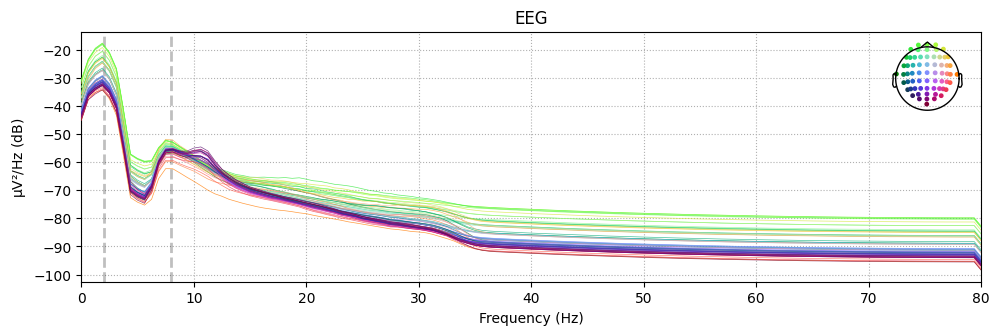

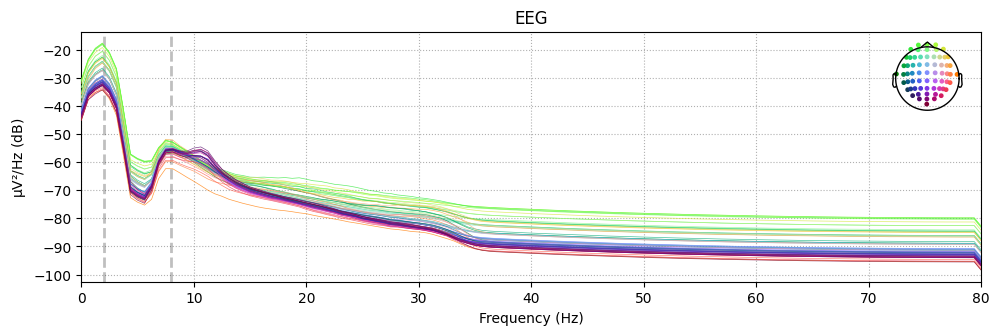

In [14]:
low_cutoff = 2
original_raw.filter(None, low_cutoff, fir_design='firwin')
original_raw.compute_psd().plot()

## Low-pass filter

Filtering raw data in 126 contiguous segments
Setting up low-pass filter at 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 61 samples (0.381 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.2s finished


Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


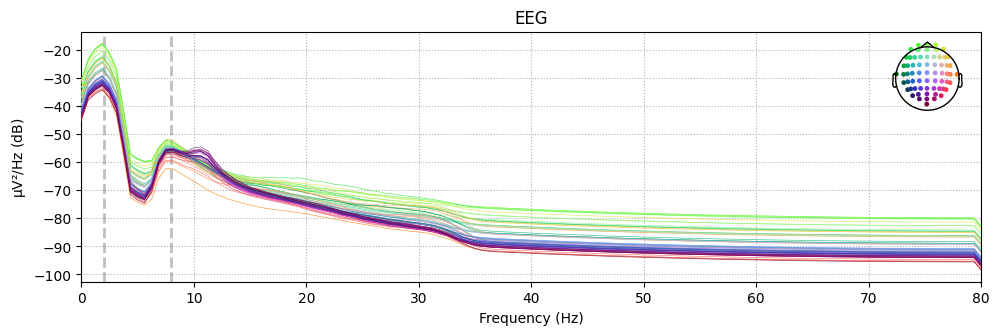

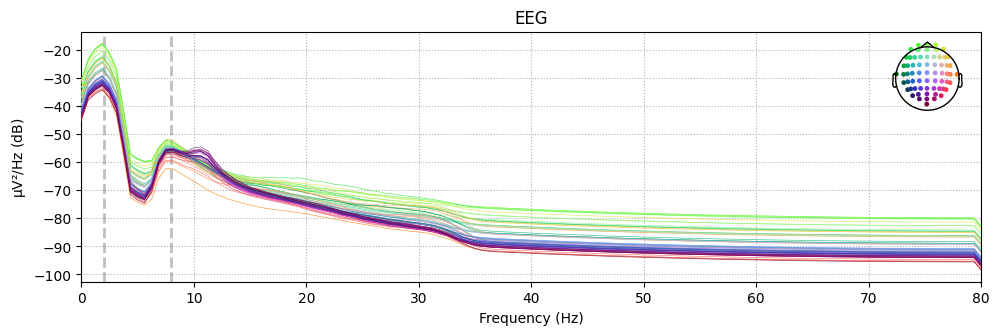

In [15]:
low_cutoff = 35
original_raw.filter(None, low_cutoff, fir_design='firwin')
original_raw.compute_psd().plot()

## Final result with basic filters

Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


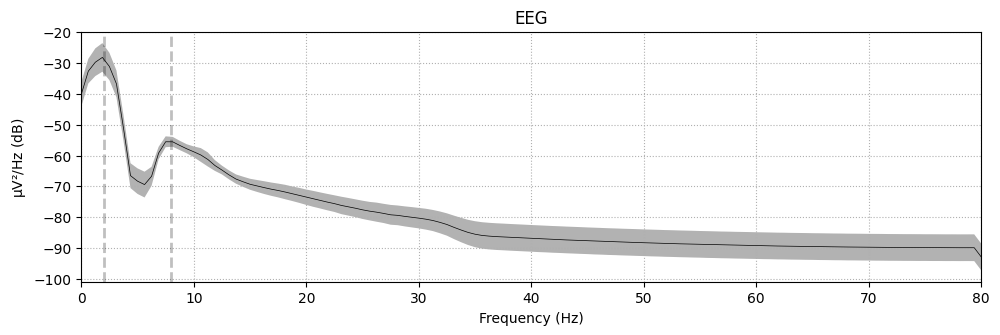

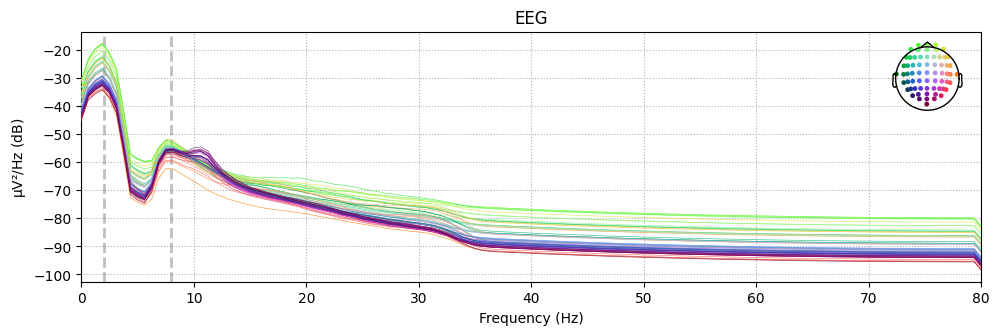

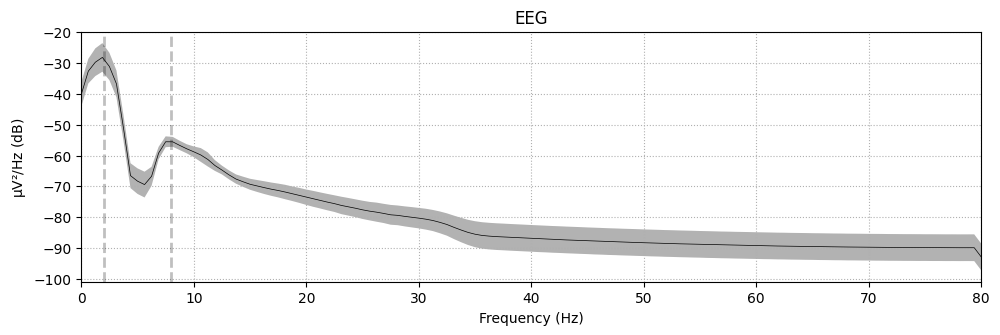

In [16]:
original_raw.compute_psd().plot()
original_raw.compute_psd().plot(average=True)

# ICA filtering

Spatial filtering: Independent component analysis (ICA) can be used to extract independent sources from EEG signals, helping to separate noise sources from brain sources.
ICA finds applications in various fields, including signal processing, pattern recognition, computer vision, and neuroscience. For example, in signal processing, ICA can be used to separate audio sources in a sound recording where multiple sound sources are mixed. In neuroscience, ICA can be used to separate brain activity into different sources that are associated with different brain processes.

The process of ICA can be summarized in a few key steps:

- **Collect mixed data:** You must collect mixed signals that result from the linear combination of different sources.
- **Problem formulation:** ICA assumes that the original source signals are statistically independent and attempts to recover them using this property. The goal is to find a transformation matrix that, when applied to the mixed signals, separates them into independent signals.
- **Estimation of independent components:** The objective is to find a demixing matrix that, when multiplied by the mixed signals, produces approximately independent demixed signals. This matrix can be obtained by maximizing a measure of non-gaussianity or independence, such as negentropy.
- **Optimization:** Optimization is used to adjust the parameters of the demixing matrix to maximize the independence property. Different optimization algorithms can be used, such as gradient descent or more sophisticated methods like FastICA.
- **Evaluation and interpretation:** Once the independent components are estimated, they can be evaluated and interpreted in the context of your problem. For example, in the field of computer vision, independent components can represent specific features or objects in images.

In [17]:
from mne.preprocessing import ICA

In [18]:
n_components = 20
ica = ICA(n_components=n_components, random_state=97, max_iter=800)

In [19]:
tmp_raw = original_raw.copy()
ica.fit(tmp_raw)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 53.9s.


Method,fastica
Fit,26 iterations on raw data (2312640 samples)
ICA components,20
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


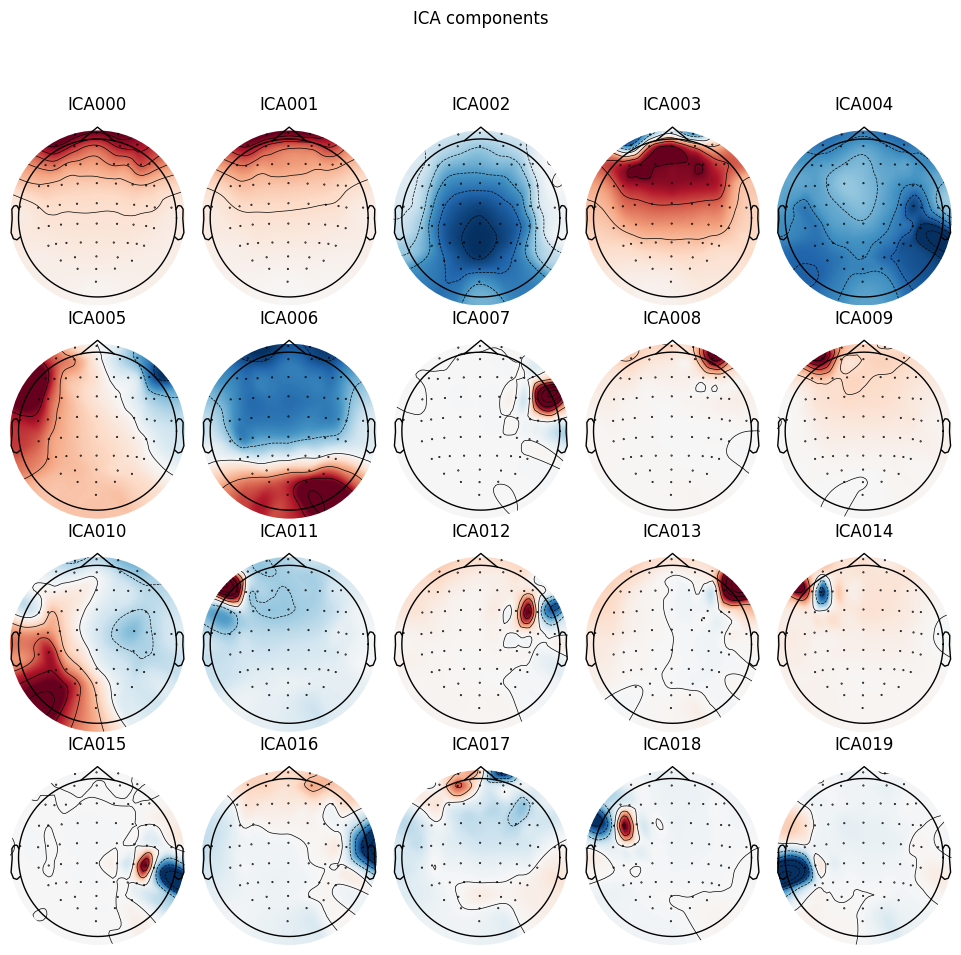

[<MNEFigure size 975x967 with 20 Axes>]

In [20]:
ica.plot_components()

In [34]:
components_to_excludes, scores = ica.find_bads_eog(tmp_raw, ch_name='Fpz')

Using EOG channel: Fpz
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1600 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1600 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


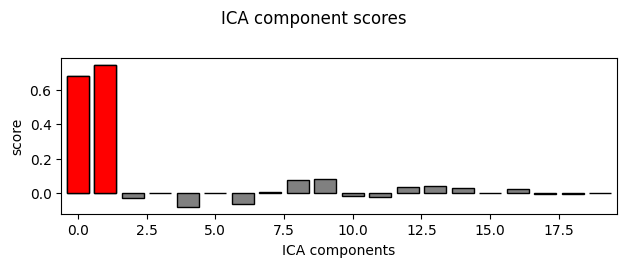

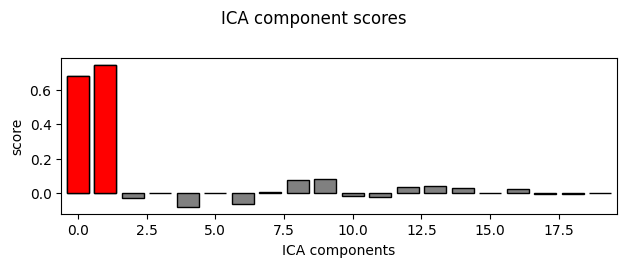

In [35]:
ica.plot_scores(scores)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated


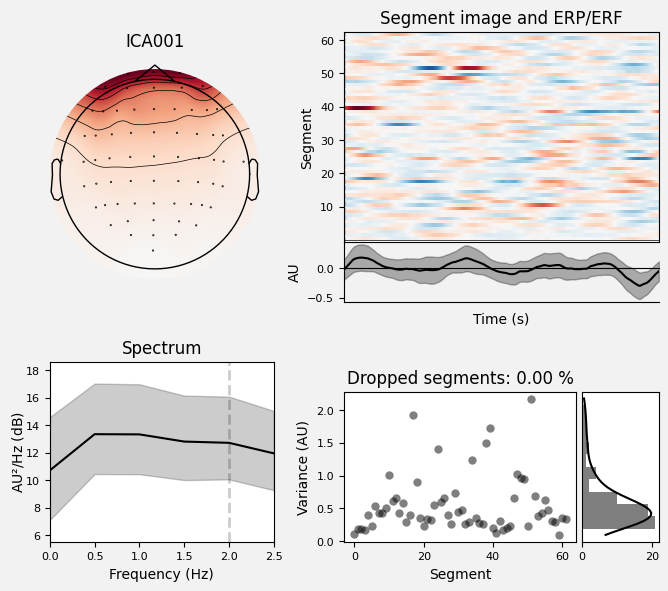

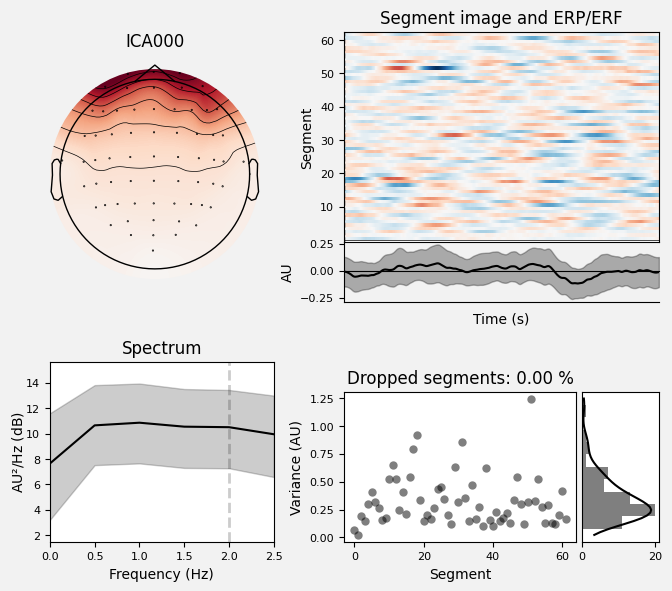

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [36]:
ica.plot_properties(tmp_raw, picks=components_to_excludes)

In [37]:
components_to_excludes

[1, 0]

In [38]:
# apply ICA with components to exclude
ica.exclude = components_to_excludes
ica.apply(tmp_raw)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 64 PCA components


<RawEDF | S001R08.edf, 64 x 2312640 (14454.0 s), ~1.10 GB, data loaded>

Creating RawArray with float64 data, n_channels=20, n_times=2312640
    Range : 0 ... 2312639 =      0.000 ... 14453.994 secs
Ready.


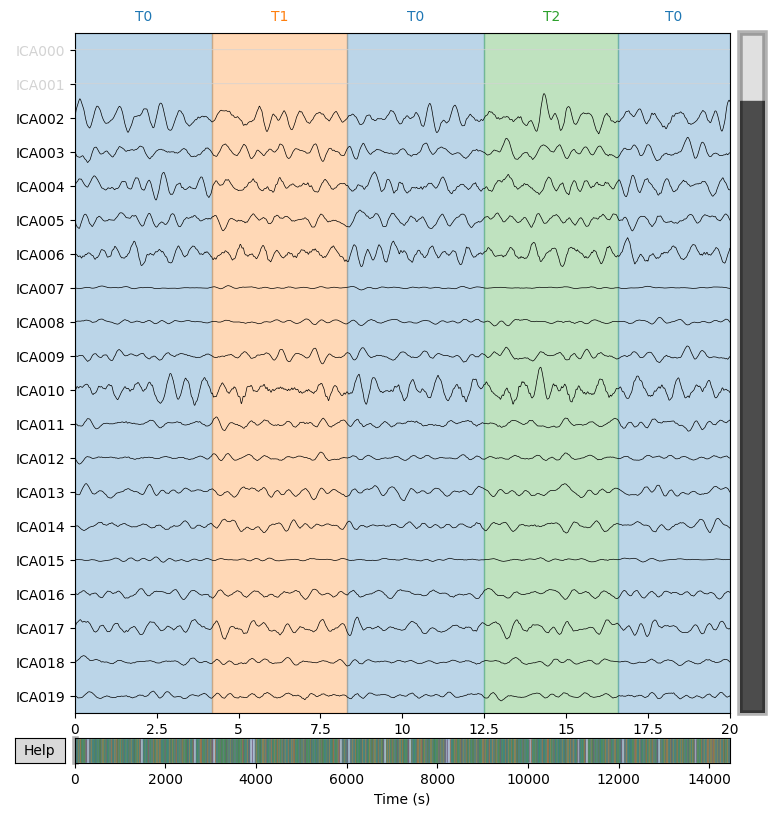

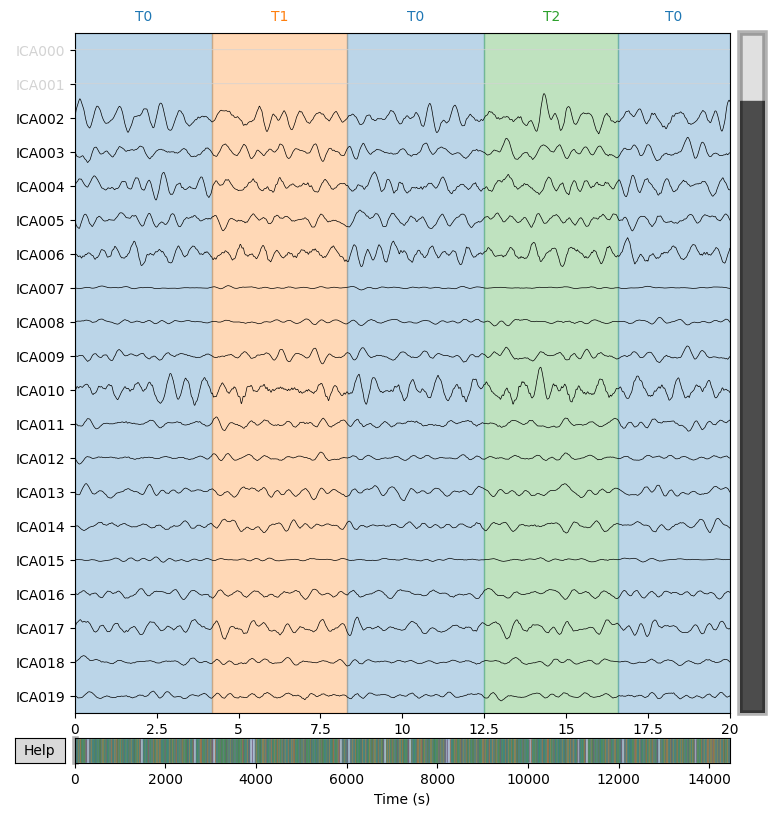

In [39]:
ica.plot_sources(tmp_raw)

Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


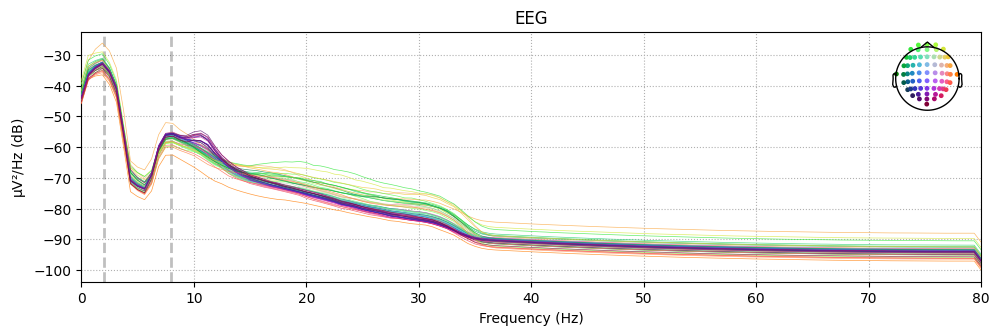

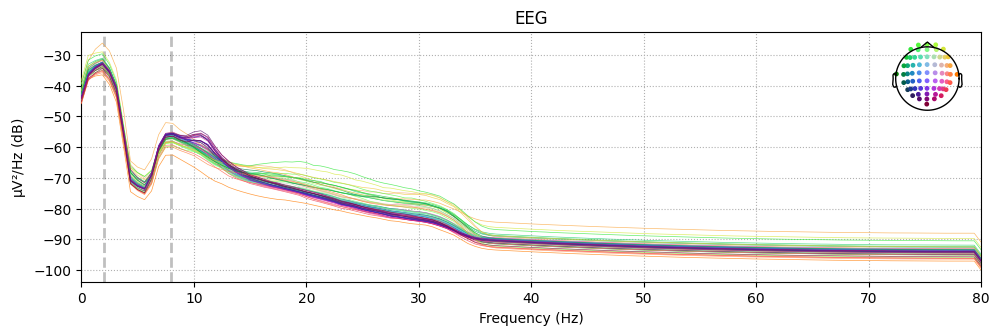

In [41]:
tmp_raw.compute_psd().plot()